# COVID-19 vaccination

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
vaccination = pd.read_csv('country_vaccinations.csv')
vaccination

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
3,Andorra,AND,2021-01-26,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
4,Andorra,AND,2021-01-27,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2600,Wales,NaN,2021-02-04,524677.0,523042.0,1635.0,32891.0,23101.0,16.64,16.59,0.05,7327.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2601,Wales,NaN,2021-02-05,559468.0,556997.0,2471.0,34791.0,25788.0,17.74,17.67,0.08,8179.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2602,Wales,NaN,2021-02-06,592228.0,589622.0,2606.0,32760.0,26854.0,18.78,18.70,0.08,8517.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
2603,Wales,NaN,2021-02-07,606768.0,603976.0,2792.0,14540.0,27089.0,19.24,19.16,0.09,8592.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [22]:
vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              2605 non-null   object 
 1   iso_code                             2364 non-null   object 
 2   date                                 2605 non-null   object 
 3   total_vaccinations                   1712 non-null   float64
 4   people_vaccinated                    1388 non-null   float64
 5   people_fully_vaccinated              845 non-null    float64
 6   daily_vaccinations_raw               1409 non-null   float64
 7   daily_vaccinations                   2502 non-null   float64
 8   total_vaccinations_per_hundred       1712 non-null   float64
 9   people_vaccinated_per_hundred        1388 non-null   float64
 10  people_fully_vaccinated_per_hundred  845 non-null    float64
 11  daily_vaccinations_per_million

In [23]:
countries = vaccination['country'].unique()

last_update = vaccination.copy()

for country in countries:
    max_country_date = max(last_update[last_update['country'] == country]['date'])
    last_update.drop(np.where((last_update['country'] == country) & (last_update['date'] != max_country_date))[0], inplace=True)
    last_update = last_update.reset_index(drop=True)

last_update

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Andorra,AND,2021-02-01,1036.0,1036.0,NaN,NaN,66.0,1.34,1.34,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
2,Argentina,ARG,2021-02-09,513178.0,322975.0,190203.0,1596.0,18139.0,1.14,0.71,0.42,401.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Austria,AUT,2021-02-09,NaN,215592.0,78852.0,NaN,8359.0,NaN,2.39,0.88,928.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
4,Bahrain,BHR,2021-02-09,212940.0,212940.0,NaN,11824.0,5552.0,12.51,12.51,NaN,3263.0,"Pfizer/BioNTech, Sinopharm/Beijing",Ministry of Health,https://twitter.com/MOH_Bahrain/status/1359245...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Turkey,TUR,2021-02-09,2732709.0,NaN,NaN,68506.0,71925.0,3.24,NaN,NaN,853.0,Sinovac,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/
76,United Arab Emirates,ARE,2021-02-09,4527144.0,NaN,NaN,113495.0,146357.0,45.77,NaN,NaN,14798.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",National Emergency Crisis and Disaster Managem...,http://covid19.ncema.gov.ae/en
77,United Kingdom,GBR,2021-02-08,13162878.0,12646486.0,516392.0,356291.0,431338.0,19.39,18.63,0.76,6354.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
78,United States,USA,2021-02-09,43206190.0,32867213.0,9840429.0,788573.0,1489333.0,12.92,9.83,2.94,4453.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [24]:
first_day = vaccination.copy()

for country in countries:
    min_country_date = min(first_day[first_day['country'] == country]['date'])
    first_day.drop(np.where((first_day['country'] == country) & (first_day['date'] != min_country_date))[0], inplace=True)
    first_day = first_day.reset_index(drop=True)
first_day

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Andorra,AND,2021-01-25,576.0,576.0,NaN,NaN,NaN,0.75,0.75,NaN,NaN,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...
2,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Austria,AUT,2021-01-10,NaN,6784.0,NaN,NaN,NaN,NaN,0.08,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
4,Bahrain,BHR,2020-12-23,38965.0,38965.0,NaN,NaN,NaN,2.29,2.29,NaN,NaN,"Pfizer/BioNTech, Sinopharm/Beijing",Ministry of Health,https://twitter.com/MOH_Bahrain/status/1359245...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Turkey,TUR,2021-01-13,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sinovac,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/
76,United Arab Emirates,ARE,2021-01-05,826301.0,NaN,NaN,NaN,NaN,8.35,NaN,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",National Emergency Crisis and Disaster Managem...,http://covid19.ncema.gov.ae/en
77,United Kingdom,GBR,2020-12-13,86095.0,86095.0,NaN,NaN,NaN,0.13,0.13,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
78,United States,USA,2020-12-20,556208.0,556208.0,NaN,NaN,NaN,0.17,0.17,NaN,NaN,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [25]:
g1 = last_update.pivot_table('people_vaccinated_per_hundred',index='country')
g1

,people_vaccinated_per_hundred
country,
Andorra,1.34
Argentina,0.71
Austria,2.39
Bahrain,12.51
Bangladesh,0.02
Belgium,2.90
Brazil,1.78
Bulgaria,0.64
Cayman Islands,13.45


In [26]:
g1.sort_values(by=['people_vaccinated_per_hundred'], inplace=True, ascending=False)
g1

,people_vaccinated_per_hundred
country,
Israel,41.68
Gibraltar,41.27
Seychelles,38.35
Wales,19.94
England,19.14
United Kingdom,18.63
Scotland,16.99
Northern Ireland,16.77
Cayman Islands,13.45


AttributeError: Can only use .str accessor with string values!

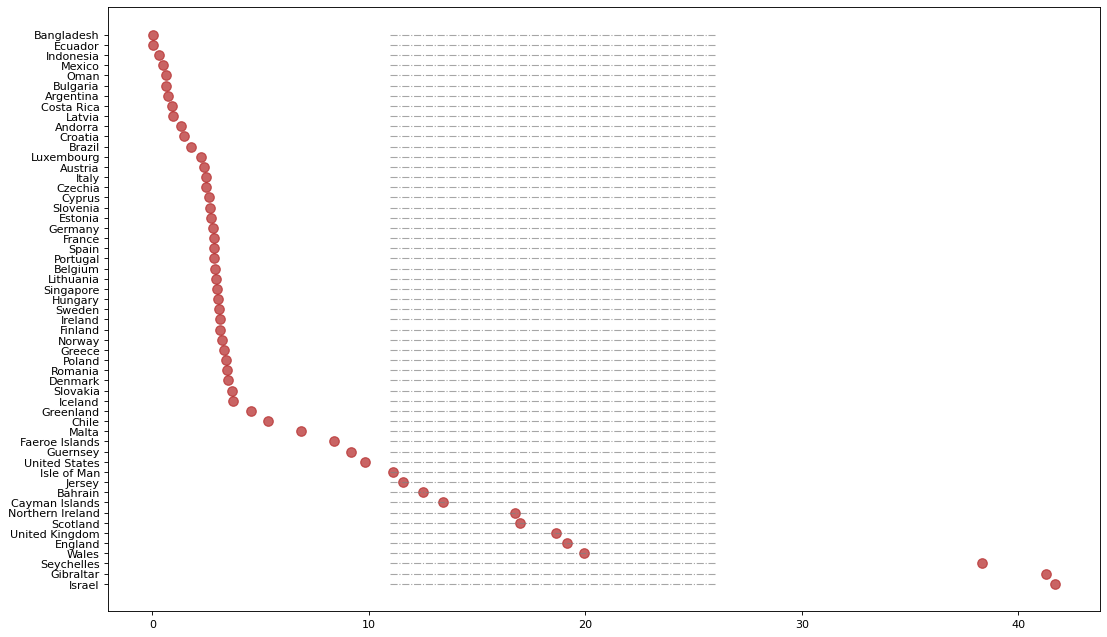

In [27]:
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=g1.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=g1.index, x=g1.people_vaccinated_per_hundred, s=75, color='firebrick', alpha=0.7)     
ax.set_yticks(g1.index)
ax.set_yticklabels(g1.people_vaccinated_per_hundred.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()
fig.savefig(graph1.pdf)

In [42]:
last_update[['people_fully_vaccinated', 'daily_vaccinations_raw']].corr()

,people_fully_vaccinated,daily_vaccinations_raw
people_fully_vaccinated,1.000000,0.834969
daily_vaccinations_raw,0.834969,1.000000


In [41]:
g3_corr = last_update.corr()
g3_corr

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
total_vaccinations,1.000000,0.995108,0.939896,0.922103,0.990489,0.109101,0.159424,0.077172,0.080771
people_vaccinated,0.995108,1.000000,0.901487,0.950997,0.989745,0.144117,0.168715,0.049082,0.128504
people_fully_vaccinated,0.939896,0.901487,1.000000,0.834969,0.928516,0.146920,0.120762,0.180796,0.082028
daily_vaccinations_raw,0.922103,0.950997,0.834969,1.000000,0.953440,0.157006,0.188465,0.037264,0.153887
daily_vaccinations,0.990489,0.989745,0.928516,0.953440,1.000000,0.056186,0.120953,0.019874,0.056861
total_vaccinations_per_hundred,0.109101,0.144117,0.146920,0.157006,0.056186,1.000000,0.976665,0.871991,0.904058
people_vaccinated_per_hundred,0.159424,0.168715,0.120762,0.188465,0.120953,0.976665,1.000000,0.747409,0.899905
people_fully_vaccinated_per_hundred,0.077172,0.049082,0.180796,0.037264,0.019874,0.871991,0.747409,1.000000,0.706245
daily_vaccinations_per_million,0.080771,0.128504,0.082028,0.153887,0.056861,0.904058,0.899905,0.706245,1.000000


In [29]:
g2 = last_update.copy()
source_category = [i * 0 for i in range(80)]
g2['source_category'] = source_category

g2

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,source_category
0,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...,0
1,Andorra,AND,2021-02-01,1036.0,1036.0,NaN,NaN,66.0,1.34,1.34,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...,0
2,Argentina,ARG,2021-02-09,513178.0,322975.0,190203.0,1596.0,18139.0,1.14,0.71,0.42,401.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,0
3,Austria,AUT,2021-02-09,NaN,215592.0,78852.0,NaN,8359.0,NaN,2.39,0.88,928.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...,0
4,Bahrain,BHR,2021-02-09,212940.0,212940.0,NaN,11824.0,5552.0,12.51,12.51,NaN,3263.0,"Pfizer/BioNTech, Sinopharm/Beijing",Ministry of Health,https://twitter.com/MOH_Bahrain/status/1359245...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Turkey,TUR,2021-02-09,2732709.0,NaN,NaN,68506.0,71925.0,3.24,NaN,NaN,853.0,Sinovac,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/,0
76,United Arab Emirates,ARE,2021-02-09,4527144.0,NaN,NaN,113495.0,146357.0,45.77,NaN,NaN,14798.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",National Emergency Crisis and Disaster Managem...,http://covid19.ncema.gov.ae/en,0
77,United Kingdom,GBR,2021-02-08,13162878.0,12646486.0,516392.0,356291.0,431338.0,19.39,18.63,0.76,6354.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,0
78,United States,USA,2021-02-09,43206190.0,32867213.0,9840429.0,788573.0,1489333.0,12.92,9.83,2.94,4453.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,0


In [30]:
g2 = g2.astype({'source_website': 'string'})
g2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              80 non-null     object 
 1   iso_code                             75 non-null     object 
 2   date                                 80 non-null     object 
 3   total_vaccinations                   79 non-null     float64
 4   people_vaccinated                    55 non-null     float64
 5   people_fully_vaccinated              50 non-null     float64
 6   daily_vaccinations_raw               50 non-null     float64
 7   daily_vaccinations                   76 non-null     float64
 8   total_vaccinations_per_hundred       79 non-null     float64
 9   people_vaccinated_per_hundred        55 non-null     float64
 10  people_fully_vaccinated_per_hundred  50 non-null     float64
 11  daily_vaccinations_per_million    

In [31]:
for i in range(80):
    if 'gov' in g2['source_website'][i]:
        g2['source_category'][i] = 0
    elif 'news' in g2['source_website'][i]:
        g2['source_category'][i] = 1
    elif 'twitter' in g2['source_website'][i]:
        g2['source_category'][i] = 2
    else:
        g2['source_category'][i] = 3
g2

<ipython-input-31-1cb332cc2d4d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2['source_category'][i] = 3
<ipython-input-31-1cb332cc2d4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2['source_category'][i] = 0
<ipython-input-31-1cb332cc2d4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g2['source_category'][i] = 2
<ipython-input-31-1cb332cc2d4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,source_category
0,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...,3
1,Andorra,AND,2021-02-01,1036.0,1036.0,NaN,NaN,66.0,1.34,1.34,NaN,854.0,Pfizer/BioNTech,Government of Andorra,https://www.govern.ad/comunicats/item/12379-se...,0
2,Argentina,ARG,2021-02-09,513178.0,322975.0,190203.0,1596.0,18139.0,1.14,0.71,0.42,401.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...,3
3,Austria,AUT,2021-02-09,NaN,215592.0,78852.0,NaN,8359.0,NaN,2.39,0.88,928.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...,3
4,Bahrain,BHR,2021-02-09,212940.0,212940.0,NaN,11824.0,5552.0,12.51,12.51,NaN,3263.0,"Pfizer/BioNTech, Sinopharm/Beijing",Ministry of Health,https://twitter.com/MOH_Bahrain/status/1359245...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Turkey,TUR,2021-02-09,2732709.0,NaN,NaN,68506.0,71925.0,3.24,NaN,NaN,853.0,Sinovac,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/,0
76,United Arab Emirates,ARE,2021-02-09,4527144.0,NaN,NaN,113495.0,146357.0,45.77,NaN,NaN,14798.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",National Emergency Crisis and Disaster Managem...,http://covid19.ncema.gov.ae/en,0
77,United Kingdom,GBR,2021-02-08,13162878.0,12646486.0,516392.0,356291.0,431338.0,19.39,18.63,0.76,6354.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,0
78,United States,USA,2021-02-09,43206190.0,32867213.0,9840429.0,788573.0,1489333.0,12.92,9.83,2.94,4453.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...,0


In [32]:
g2_source = g2.pivot_table('source_category', index='country')
g2_source

,source_category
country,
Algeria,3
Andorra,0
Argentina,3
Austria,3
Bahrain,2
...,...
Turkey,0
United Arab Emirates,0
United Kingdom,0


AttributeError: 'Series' object has no attribute 'title'

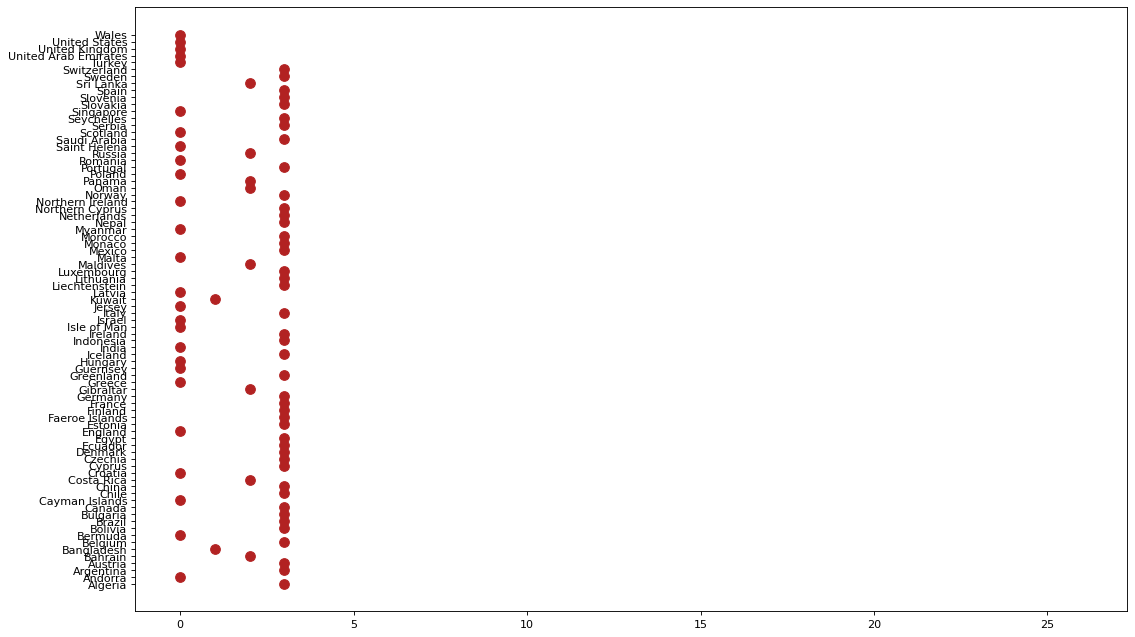

In [37]:
fig1, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=g2_source.index, xmin=11, xmax=26, color='white')
ax.scatter(y=g2_source.index, x=g2_source.source_category, s=75, color='firebrick', alpha=1)     
ax.set_yticks(g2_source.index)
ax.set_yticklabels(g2_source.source_category.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

In [38]:
f = ax.get_figure()
f.savefig('te.pdf')